### TP 1 - Gradient et gradient conjugué

Polycopie pag 59 : algorithme 5.7 - algorithme du gradient, pas variable (rho variable)

algorithme 5.8 (pag 61) - pas fixe (rho constant)

Polycopie pag 66 : algorithme 5.11 - algotithme du gradient conjugué pour une fonctionnelle quadratique 


# Optimisation numérique - méthodes de gradient
$\newcommand{\x} {\mathbf{x}}$
$\newcommand{\R} {\mathbb{R}}$
$\newcommand{\A} {\mathbf{A}}$
$\newcommand{\H} {\mathbf{H}}$
$\newcommand{\b} {\mathbf{b}}$
$\newcommand{\DPS} {\displaystyle}$
$\DeclareMathOperator*{\argmin}{arg\,min}$

## Exercice 1
Le  but de  cet exercice  est de  vous familiariser  avec les  méthodes numériques  de base  pour la résolution de problèmes de minimisation convexe. Pour cela, nous considérerons dans un premier temps la fonctionnelle $f:\R^2 \rightarrow \R$ suivante
\begin{equation}
 f(x_1, x_2) = 2x_1^2 + x_2^2 + x_1 x_2 + x_1 + x_2 \tag{1}
\end{equation}
montrée sur la figure ci-dessous :




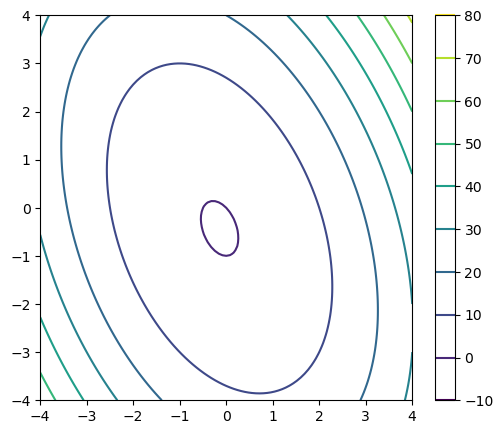

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def fex1(x1,x2):
    return 2*x1**2 + x2**2 + x1*x2 + x1 + x2

fig01=plt.figure(figsize=(6,5))
ax0101=fig01.add_subplot(111)
xdemo=np.linspace(-4,4,101)
ydemo=np.linspace(-4,4,101)
Mex1=np.array([[fex1(x,y) for x in xdemo] for y in ydemo])
cset=ax0101.contour(xdemo,ydemo,Mex1)
fig01.colorbar(cset);

L'objectif est donc de trouver $\x^*=[x_1^*, x_2^*]^T$ tel que
\begin{equation}
	\x^* = \argmin_{\x}{f(\x)}
\end{equation}
Bien que, dans  le cas présent, ce  problème puisse être résolu analytiquement,  nous utiliserons ce petit exemple  comme un cas  test afin de  valider les divers  algorithmes de minimisation  que vous aurez à implémenter avant de s'attaquer à des problèmes plus réalistes.

### Question 1
Mettez la fonction (1) sous la forme suivante
\begin{equation}
	f(\x) = \frac{1}{2} \x^T \A \x - \x^T \b + c,\tag{2}
\end{equation}
puis exprimez le gradient $\nabla f(\x)$  et la matrice Hessienne $\H_{ij} = \DPS
\frac{\partial^2 f}{\partial x_i \partial x_j}$ en fonction de $\A$, $\x$ et $\b$.

(les vecteurs seront déclarés comme des tableaux numpy à $n$ lignes et 1 colonne)



In [75]:
Aex1=np.array([[4,1],[1,2]]) #matrix
bex1=np.array([-1,-1]) #vecteur
cex1=np.zeros(1)

def gradfex1(A,b,x):
    gradfex1 = np.dot(A,x) - b
    return gradfex1

hessex1 = Aex1
print("La hessienne est ", hessex1)


La hessienne est  [[4 1]
 [1 2]]


### Question 2
Montrez que minimiser la fonctionnelle quadratique $f(\mathbf{x})$ revient à résoudre le problème linéaire suivant
\begin{equation}
	{\bf Ax} = {\bf b},\tag{3}
\end{equation}
puis résoudre ce problème analytiquement pour $f({\bf x})$ donnée par (2).

In [76]:
# Trouver la valeur de x par l'equation (3) :

xex2 = np.dot(np.linalg.inv(Aex1), bex1)

print("La valeur minimale que minimise la fonctionnelle quadratique est ", xex2)

# Vérification du gradient :

gradex2 = gradfex1(Aex1,bex1,xex2)

print("On vérifie la validité si on trouve le gradient = 0, donc, grad = ", gradex2)

La valeur minimale que minimise la fonctionnelle quadratique est  [-0.14285714 -0.42857143]
On vérifie la validité si on trouve le gradient = 0, donc, grad =  [0. 0.]


### Question 3
Bien que,  pour le cas présent,  le système linéaire (3) puisse  être résolu analytiquement, il  est préférable en  règle générale (p. ex. quand $\A \in \R^{n  \times n}$ avec $n > 100$) d'utiliser des méthodes itératives. Deux des méthodes les plus utilisées sont :
1. la méthode de descente de gradient,
2. la méthode du gradient conjugué.


#### Descente de gradient
Dans cette partie, il vous est démandé de compléter la fonction `pas_fixe` pour coder l'algorithme de descente de gradient.

In [77]:
def pas_fixe(x0,fonction,gradient,pas=1.0e-2,tol=1.0e-10,itermax=10000):
    A=fonction['A']
    b=fonction['b']
    c=fonction['c']
    rho = pas

    #***** Initialisation *****
    xx = [x0]
    dir = -gradfex1(A, b, xx[-1])
    residu = [np.linalg.norm(gradfex1(A,b,xx[-1]))] #erreur, c'est une liste pour ajouter des valeurs

    k=0
    while residu[-1] >= tol and k <= itermax:
        #----- Calcul de x(k+1) -----
        xex3 = xx[-1]  + rho*dir
        xx.append(xex3)
        gradfex3 = -gradfex1(A, b, xex3)
        
        #----- Calcul de la nouvelle direction de descente d(x+1) -----
        dir = gradfex3

        #----- Calcul du residu r(k+1) -----
        residu.append(np.linalg.norm(gradfex3))
        k= k+1

    return {'xx':np.asarray(xx),'residu':np.asarray(residu)}

et de l'utiliser pour la résolution du problème, d'abord en déclarant le dictionnaire associé à la fonction à minimiser

In [78]:
fonction={'A':Aex1, 'b':bex1, 'c':cex1}


puis en appelant la fonction `pas_fixe` avec les bons arguments

In [79]:
x0=np.array([3.5,3.5])
cas_01=pas_fixe(x0,fonction,gradfex1,1.0e-1,1.0e-6,10000)
print(cas_01['xx'][-1], len(cas_01['xx'])-1)

[-0.14285736 -0.42857091] 88


et en visualisant les résultats

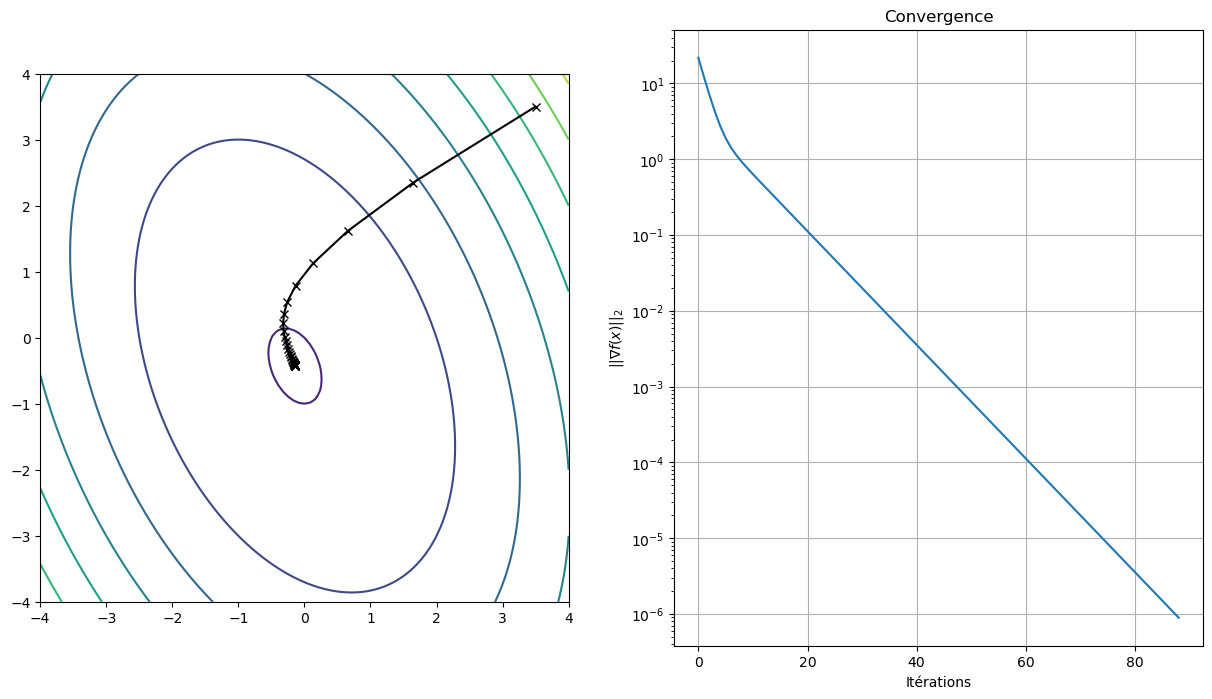

In [80]:
def plot(xx,res):
    fig02=plt.figure(figsize=(15,8))
    ax0102=fig02.add_subplot(121)

    ax0102.contour(xdemo, ydemo, Mex1)

    ax0102.plot(xx[:,0],xx[:,1],'k-x')

    ax0102.set_aspect('equal')

    ax0202=fig02.add_subplot(122)
    ax0202.plot(res)
    ax0202.set_yscale('log')
    ax0202.grid()
    ax0202.set_xlabel('Itérations')
    ax0202.set_ylabel(r'$||\nabla f(x) ||_2$')
    ax0202.set_title('Convergence')

plot(cas_01['xx'],cas_01['residu'])

#### Gradient conjugué
Dans cette partie, il vous est démandé de compléter la fonction `conjugate` pour coder l'algorithme de gradient conjugué.

In [81]:
def conjugate(x0,fonction,gradient,tol=1.0e-10,itermax=10000):
    A=fonction['A']
    b=fonction['b']
    c=fonction['c']

    #***** Initialisation *****
    xx=[x0]
    dir = -gradfex1(A, b, xx[-1])
    residu = [np.linalg.norm(gradfex1(A,b,xx[-1]))] #erreur, c'est une liste pour ajouter des valeurs
    grad = gradfex1(A, b, xx[-1])
    
    k=0
    while residu[-1] >= tol and k <= itermax:
        norm_A = np.sqrt(np.dot(np.dot(A, dir), dir))
        #----- Calcul de rho(k) -----
        rho = - (np.dot(gradfex1(A, b, xx[-1]), dir))/norm_A**2

        #----- Calcul de x(k+1) -----
        xex3 = xx[-1]  + rho*dir
        xx.append(xex3)
        grad = gradfex1(A, b, xex3) #nouveau grad avec xex3

        #----- Calcul de la nouvelle direction de descente d(x+1) -----
        beta = (np.dot(np.dot(A,grad), dir))/norm_A**2
        dir = -grad + beta*dir

        #----- Calcul du residu r(k+1) -----
        residu.append(np.linalg.norm(grad))
        k= k+1

    return {'xx':np.asarray(xx),'residu':np.asarray(residu)}

et de l'utiliser pour la résolution du problème

[-0.14285714 -0.42857143] 2


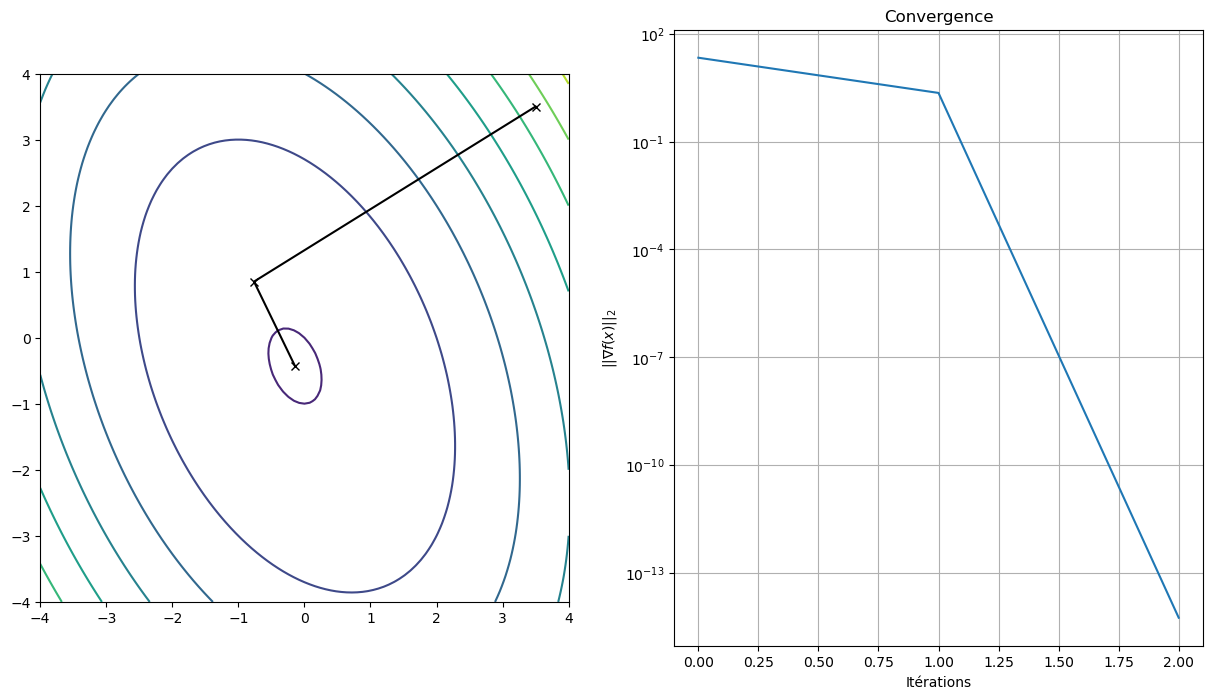

In [82]:
x0=np.array([3.5,3.5])
cas_02=conjugate(x0,fonction,gradfex1,1.0e-6,10000)
print(cas_02['xx'][-1], len(cas_02['xx'])-1)
plot(cas_02['xx'],cas_02['residu'])

### Conclusion
En utilisant les  différentes courbes sorties par  le code, discutez des  avantages et inconvénients des deux méthodes en terme de vitesse de convergence, temps de calcul, nombre d'itérations, du choix du pas pour la descente de gradient, etc.

## Exercice 2
Intéressons  nous maintenant  à un  exemple  plus concret  de minimisation  convexe. Une  entreprise souhaite ouvrir un nouvel entrepôt à partir duquel elle  sera amenée à livrer son produit dans les 8 villes listées  dans le tableau ci-dessous. L'objectif est  donc  de trouver  où  placer l'entrepôt  de manière  à  minimiser la  distance parcourue par les camions de livraison. Un tel problème pratique peut être formulé comme un problème de minimisation convexe et résolu à l'aide des méthodes développées dans l'exercice précédent.

|  | Lille | Orléans |  Lyon  |  Paris  | Marseille  |  Strasbourg  | Rennes  | Metz |
|:---|:--:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
|  Nord-Sud (km) | 197 | -105 | -343 | 0 | -617 | -31 | -88  | 30  |
| Est-Ouest (km) | 52  | -33  | 185  | 0 | 225  | 403 | -300 | 285 |


### Question 1
En définissant  $\x_e  = [x_e, y_e]^T$  comme étant  la position optimale de  l'entrepôt par rapport  au centre  de Paris, montrez  que trouver cette  position $\x_e$ revient à minimiser une fonctionelle quadratique du type
\begin{equation}
  f(\x) = \frac{1}{2} \x^T \A\x - \x^T\b + c
\end{equation}
pour laquelle vous déterminerez l'expression des termes $\A$, $\b$ et $c$.

In [83]:
xi = np.array([52,-33,185,0,225,403,-300,285])
yi = np.array([197,-105,-343,0,-617,-31,-88,30])

A = np.array([[16, 0],[0, 16]])
b = np.array([2*sum(xi), 2*sum(yi)])
c = sum(xi**2)+sum(yi**2)

fonction2={'A':A, 'b':b, 'c':c}

### Question 2
En utilisant le code développé lors de l'exercice 1, déterminez la position optimale de l'entrepôt. Cette position vous semble-t-elle raisonnable ?

[ 102.125 -119.625] 1


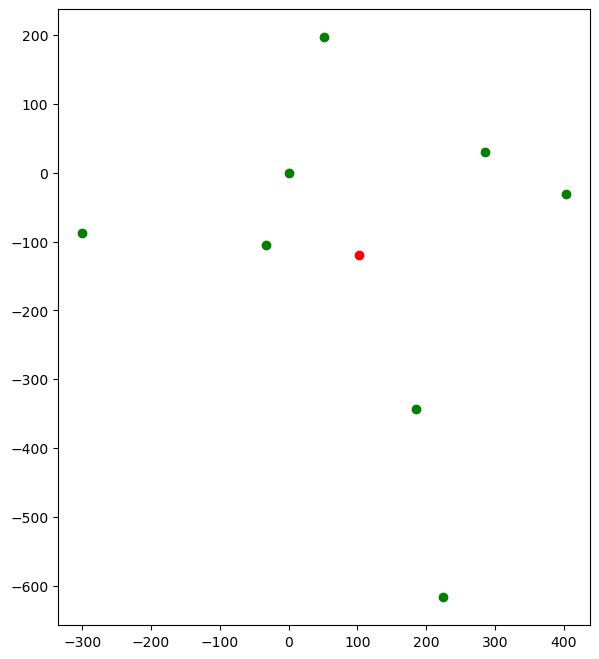

In [85]:
x0=np.array([0,0])
cas_03=conjugate(x0,fonction2,gradfex1,1.0e-6,10000)
print(cas_03['xx'][-1], len(cas_03['xx'])-1)

fig03=plt.figure(figsize=(8,8))
ax0301=fig03.add_subplot(111)
ax0301.plot(xi,yi,'og')
ax0301.set_aspect("equal")
ax0301.plot(*cas_03['xx'][-1],'or');
